In [19]:
import os 
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np 
from itertools import combinations
import random 

In [149]:
## MARGIN STUDY
with open("imagenet_class_index.json", 'r') as json_file:
            data = json.load(json_file)


def compute_pmf(margin_values, total_count, nbins, experiment):
    # Define a stylish color palette
    stylish_palette = ['#264653', '#2A9D8F', '#E76F51']
    sns.set(style="whitegrid")
 
    # Plot the PMF using valid values and the stylish color palette
    plt.figure(figsize=(6, 6))
    sns.histplot(margin_values[1:total_count], kde=True, stat='density', bins=nbins, color=stylish_palette[0], alpha=0.7, edgecolor='white')
    sns.kdeplot(margin_values[1:total_count], color=stylish_palette[1], linewidth=2)

    # Calculate and plot the mean value
    mean_value = np.mean(margin_values[1:total_count])
    plt.axvline(mean_value, color=stylish_palette[2], linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}\nCount: {total_count} ')
    plt.text(mean_value + 0.2, 0.18, f'Mean: {mean_value:.2f}', color=stylish_palette[2], fontsize=12, va='center')

    # Customize the plot aesthetics
    plt.title(f"Margin PMF for {experiment}", fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(fontsize=12)
    plt.xlim(0, 25)
    plt.ylim(0, 0.8)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Show the plot
    plt.show()


def compute_pmf_classes(margin_dfs, nbins, class_label, experiments, y_lim,total_count= None): 
    print(class_label)
    stylish_palette = ['#264653', '#2A9D8F', '#E76F51', '#F4A261']
    plt.figure(figsize=(6, 6))
    # write the density curve for the class belonging to each dataset
    for i,df in enumerate(margin_dfs):
            if len(df)>0:
                #print(experiments[i])
                class_df = df[(df["Class"] == class_label) | (df["Class"] == str(class_label))]
                if len(class_df)>0:
                    if total_count == None:
                        total_count = len(class_df)
                    
                    print("class len: ", len(class_df ))
                    margin_values =  class_df["Margin"].values
                    
                    
                    np.random.shuffle(margin_values)
                    print("mean: ", np.mean(margin_values))
                    print("std:", np.std(margin_values))
                    print("median: ", np.median(margin_values))
            
                    legend = f"{experiments[i]} | Count: {len(margin_values)} | Mean: {np.round(np.mean(margin_values),3)}"
                    sns.kdeplot(margin_values[1:total_count], color=stylish_palette[i], label=legend, linewidth=2)
                    

    plt.title(f"Margin PMF for {data[str(class_label)][1]}")
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend() 
    plt.xlim(0, 25)
    plt.ylim(0, y_lim)

    # Remove top and right spines for a cleaner look
    sns.despine()
    # Show the plot
    plt.show()
    

In [150]:
# get the experimate and concatenate runs
model = "ResNet18"
root_margin = f"results/{model}/margin_values/"
margins_csv_path = [os.path.join(root_margin, file) for file in os.listdir(root_margin)]
experiments= [line.split(".csv")[0].split("margin_values/")[1] for line in margins_csv_path]
margin_df_list = [pd.read_csv(csv, names=['Class', 'Margin']) for csv in margins_csv_path]
print(experiments)

['ResNet18_ImageNetA_small_N35_R15', 'ResNet18_ImageNetA_small_N35_R15_run_2', 'ResNet18_ImageNetSD_small_N35_R15', 'ResNet18_ImageNetVal_small_N1_R2_run_2', 'ResNet18_ImageNetVal_small_N35_R15', 'ResNet18_SignalBlur_small_N35_R15']


In [151]:
ResNet18_ImageNetA_small_N35_R15 =  pd.concat([margin_df_list[0],margin_df_list[1]], axis = 0)
ResNet18_ImageNetSD_small_N35_R15 = margin_df_list[2]
ResNet18_ImageNetVal_small_N35_R15=  margin_df_list[4]
ResNet18_SignalBlur_small_N35_R15 = margin_df_list[5]

print("A",len(ResNet18_ImageNetA_small_N35_R15))
print("SD",len(ResNet18_ImageNetSD_small_N35_R15))
print("Val",len(ResNet18_ImageNetVal_small_N35_R15))
print("Blur",len(ResNet18_SignalBlur_small_N35_R15))

A 0
SD 252101
Val 1271550
Blur 191100


In [152]:
model = "ViT"
root_margin = f"results/{model}/margin_values/"
margins_csv_path = [os.path.join(root_margin, file) for file in os.listdir(root_margin)]
experiments= [line.split(".csv")[0].split("margin_values/")[1] for line in margins_csv_path]
margin_df_list = [pd.read_csv(csv, names=['Class', 'Margin']) for csv in margins_csv_path]
print(experiments)

['ViT_ImageNetA_small_N35_R15', 'ViT_ImageNetA_small_N35_R15_run_2', 'ViT_ImageNetSD_small_N35_R15', 'ViT_ImageNetSD_small_N35_R15_run_2', 'ViT_ImageNetSD_small_N35_R15_run_3', 'ViT_ImageNetSD_small_N35_R15_run_4', 'ViT_ImageNetVal_small_N35_R15', 'ViT_SignalBlur_small_N35_R15', 'ViT_SignalBlur_small_N35_R15_run_2', 'ViT_SignalBlur_small_N35_R15_run_4']


In [153]:
ViT_ImageNetA_small_N35_R15 = pd.concat([margin_df_list[0] ,margin_df_list[1]],axis = 0)
ViT_ImageNetSD_small_N35_R15 = pd.concat([margin_df_list[2],margin_df_list[3], margin_df_list[4],  margin_df_list[5]], axis= 0 )
ViT_ImageNetVal_small_N35_R15 = margin_df_list[6]
ViT_SignalBlur_small_N35_R15 =  pd.concat([margin_df_list[7], margin_df_list[8],  margin_df_list[7]], axis= 0 )

print("A",len(ViT_ImageNetA_small_N35_R15))
print("SD",len(ViT_ImageNetSD_small_N35_R15))
print("Val",len(ViT_ImageNetVal_small_N35_R15))
print("Blur",len(ViT_SignalBlur_small_N35_R15))

A 6853
SD 159628
Val 1286250
Blur 282197


In [154]:
margin_df_ResNet_list = [ResNet18_ImageNetA_small_N35_R15,
                    ResNet18_ImageNetSD_small_N35_R15,
                    ResNet18_ImageNetVal_small_N35_R15,
                    ResNet18_SignalBlur_small_N35_R15]

margin_df_Vit_list = [ViT_ImageNetA_small_N35_R15,
                    ViT_ImageNetSD_small_N35_R15,
                    ViT_ImageNetVal_small_N35_R15,
                    ViT_SignalBlur_small_N35_R15]


ResNet18 and ImageNetSD
mean:  10.364423337471885
std: 3.716180130757664
mean:  11.0983


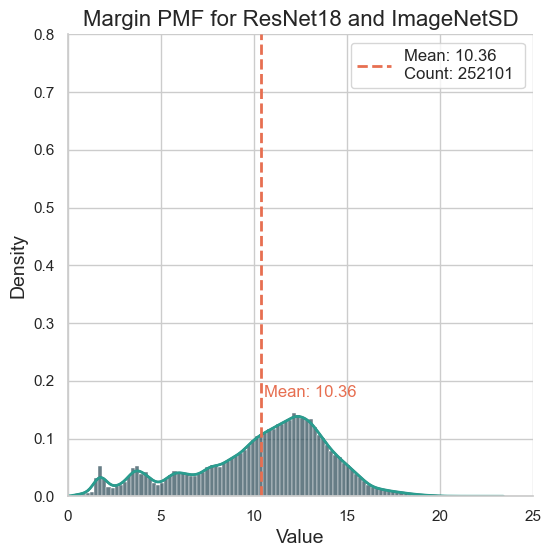

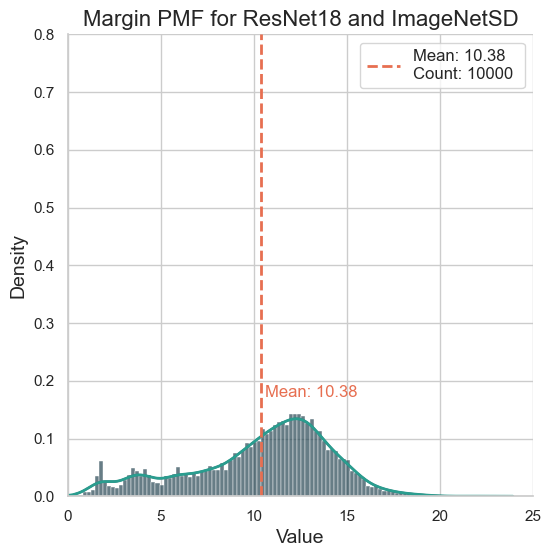


ResNet18 and ImageNetVal
mean:  13.323084890881207
std: 4.237159338065852
mean:  13.8234


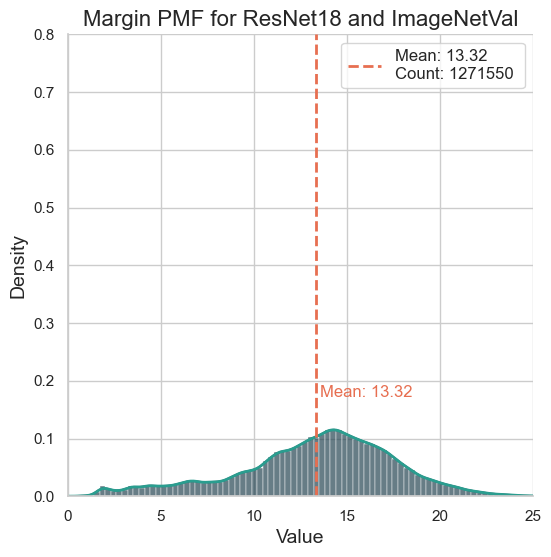

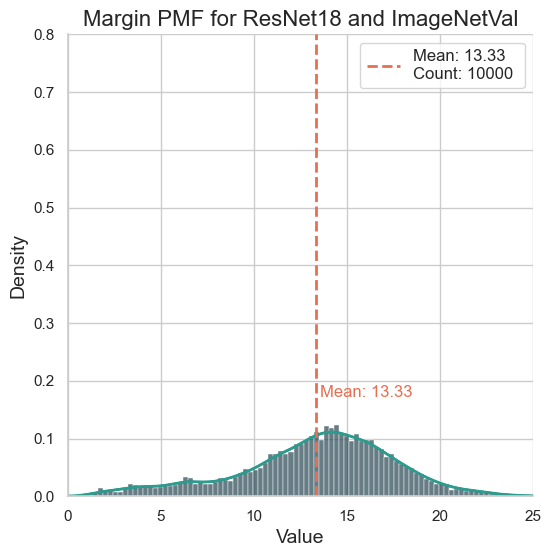


ResNet18 and SignalBlur
mean:  4.976927525807735
std: 2.9867630836095853
mean:  4.6473


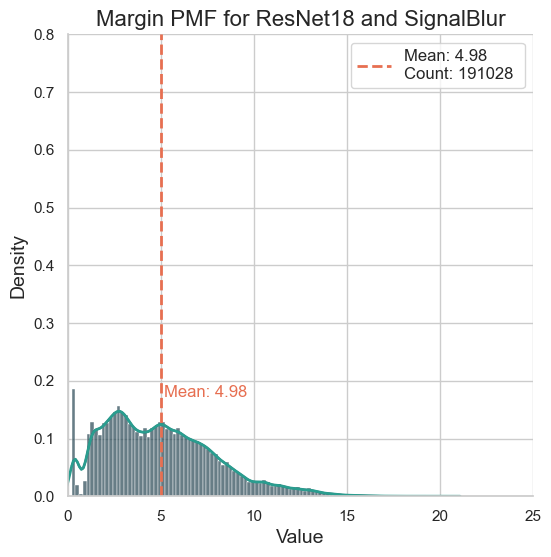

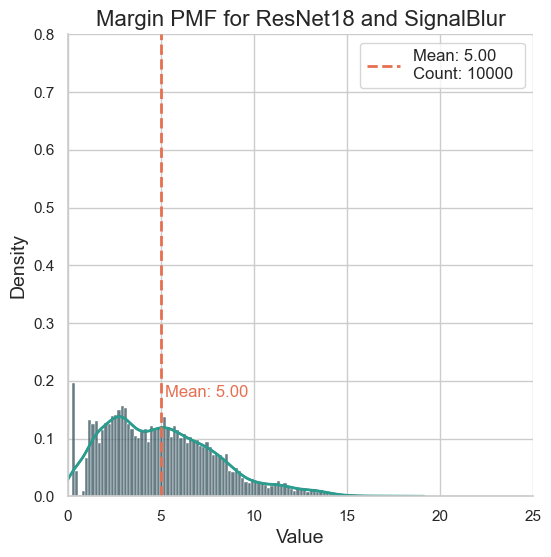

In [155]:
### Margins ResNet: ANALISIS DATASET
# remove intances with negative values:
experiments_names =  ['ResNet18 and ImageNetA', 'ResNet18 and ImageNetSD', 'ResNet18 and ImageNetVal','ResNet18 and SignalBlur']
np.random.seed(42)
for df in margin_df_ResNet_list:
    df.drop(df[df['Margin'] < 0].index, inplace=True)

for i,df in enumerate(margin_df_ResNet_list):
        if len(df) >0:
            margin_values = df['Margin'].values
            print(f"\n{experiments_names[i]}")
            print("mean: ", np.mean(margin_values))
            print("std:", np.std(margin_values))
            print("mean: ", np.median(margin_values))
           
            np.random.shuffle(margin_values)
            compute_pmf(margin_values, len(df), 100, experiments_names[i])
            compute_pmf(margin_values, 10000, 100, experiments_names[i])


ViT amd  ImageNetA
mean:  11.86005012403327
std: 2.794912869873444
mean:  12.779


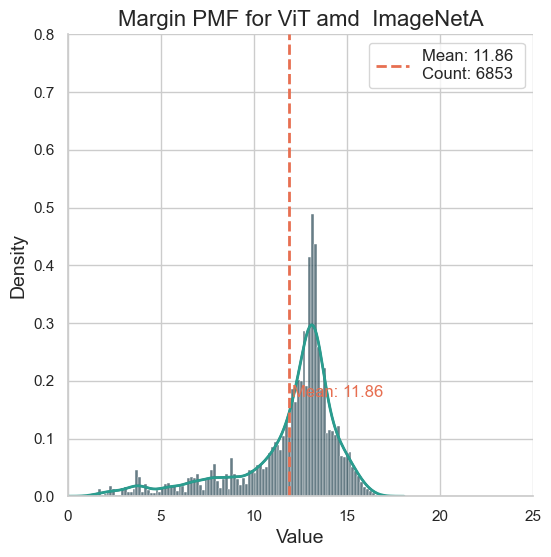

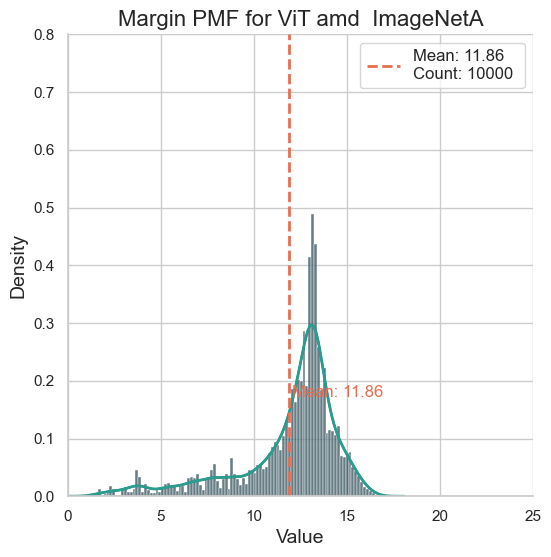


ViT and ImageNetSD
mean:  9.993948985766908
std: 1.7501474968493667
mean:  10.1099


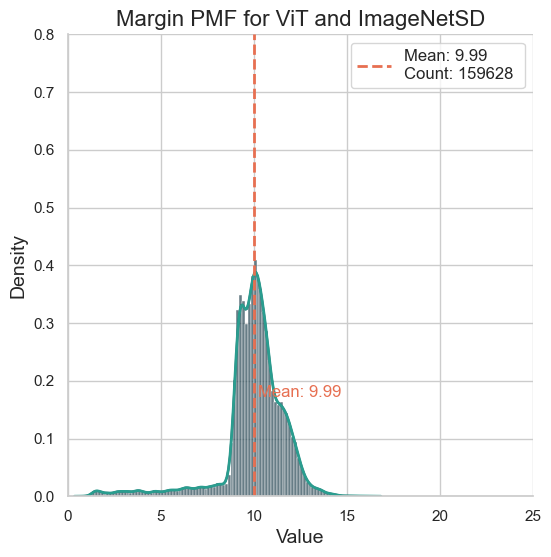

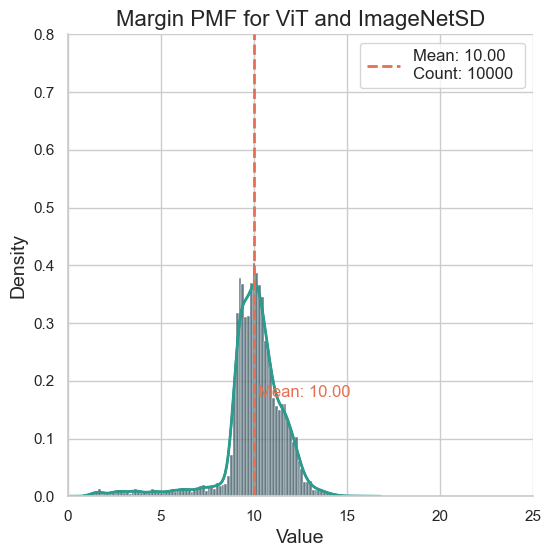


ViT and ImageNetVal
mean:  9.486574270787171
std: 1.1280399451031429
mean:  9.4568


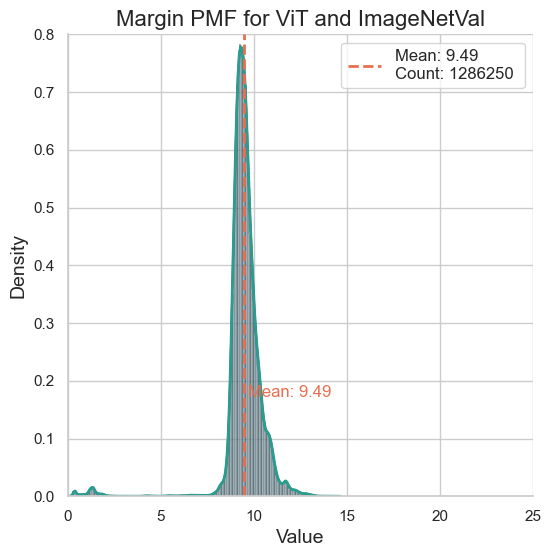

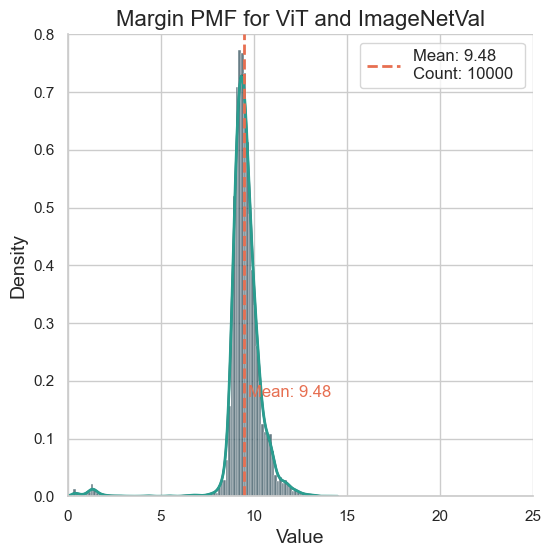


ViT and SignalBlur
mean:  10.589665361763975
std: 2.6469901339553767
mean:  11.0838


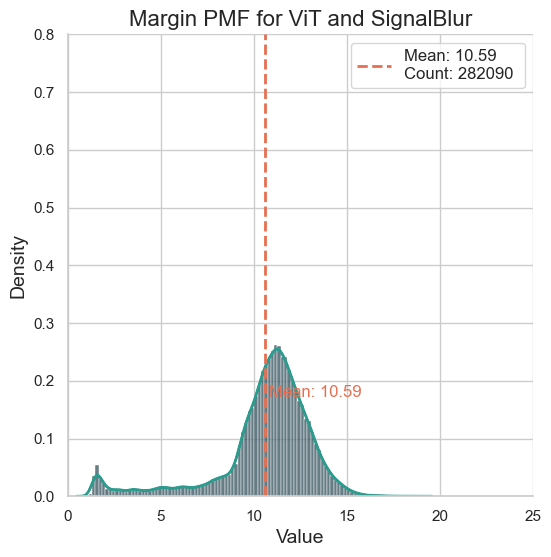

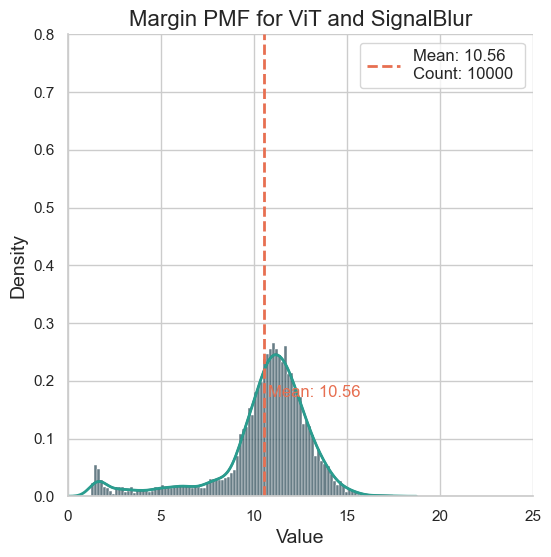

In [157]:
### Margins ViT: ANALISIS DATASET
# remove intances with negative values:
experiments_names =  ['ViT amd  ImageNetA', 'ViT and ImageNetSD', 'ViT and ImageNetVal','ViT and SignalBlur']
np.random.seed(42)
for df in margin_df_Vit_list:
    df.drop(df[df['Margin'] < 0].index, inplace=True)

for i,df in enumerate(margin_df_Vit_list):
        if len(df) >0:
            margin_values = df['Margin'].values
            print(f"\n{experiments_names[i]}")
            print("mean: ", np.mean(margin_values))
            print("std:", np.std(margin_values))
            print("mean: ", np.median(margin_values))
           
            np.random.shuffle(margin_values)
            compute_pmf(margin_values, len(df), 100, experiments_names[i])
            compute_pmf(margin_values, 10000, 100, experiments_names[i])

6
class len:  44100
mean:  10.375701925170068
std: 3.712044694219317
median:  11.1202
class len:  242550
mean:  13.309499285508146
std: 4.241243717475877
median:  13.8163
class len:  51450
mean:  4.975126958211856
std: 2.985678517105374
median:  4.6343


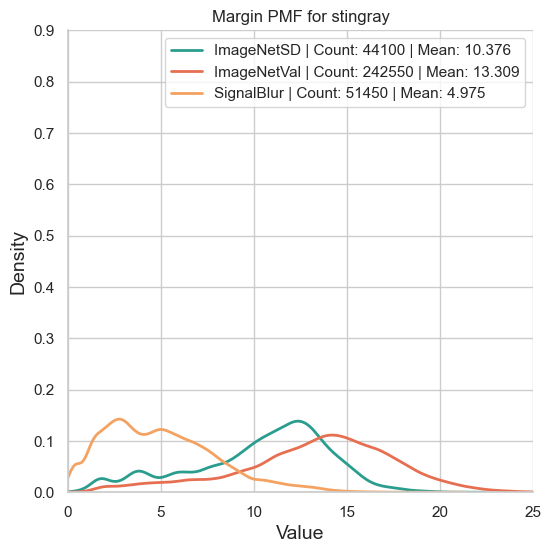

13
class len:  120046
mean:  10.350254960598436
std: 3.7163212675990898
median:  11.08305
class len:  257250
mean:  13.32743153663751
std: 4.23429722856616
median:  13.817
class len:  58800
mean:  4.980593452380952
std: 2.9830121286034967
median:  4.66445


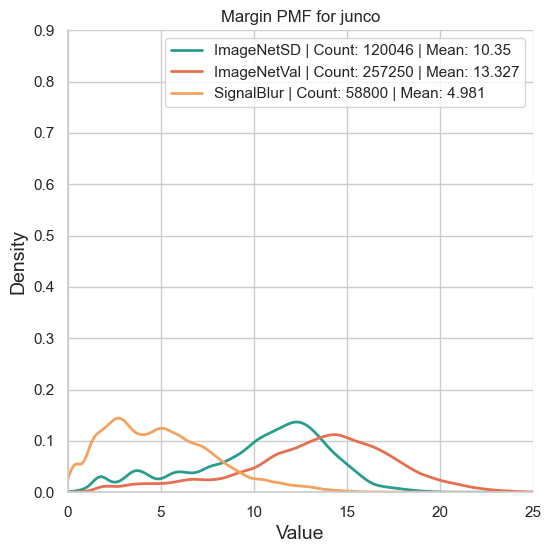

22
class len:  31850
mean:  10.382972759811619
std: 3.7286227992469203
median:  11.12295
class len:  257250
mean:  13.323623645481048
std: 4.23290540321553
median:  13.8207
class len:  58784
mean:  4.969436749795864
std: 2.9973375797698463
median:  4.63845


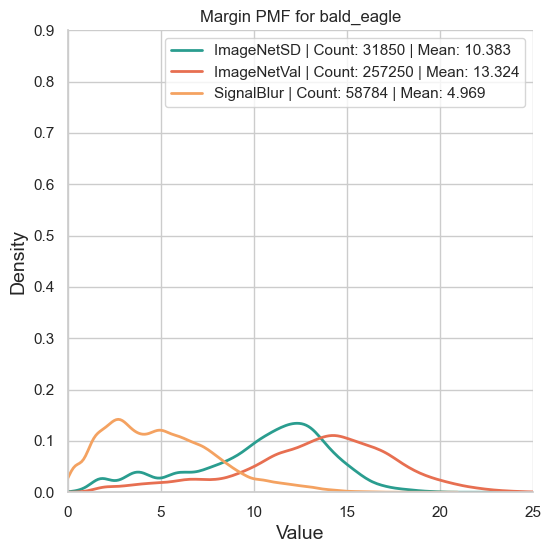

30
class len:  25725
mean:  10.374515063168126
std: 3.70749219372239
median:  11.1158
class len:  257250
mean:  13.326438298542277
std: 4.24409494338168
median:  13.8325
class len:  14676
mean:  5.007034948214772
std: 2.9711705654856937
median:  4.68155


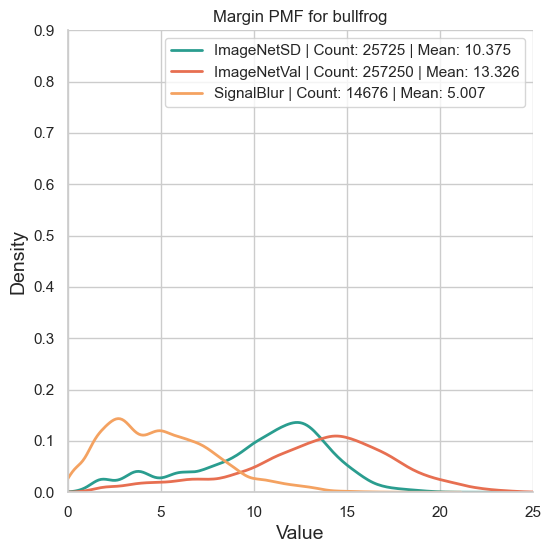

42
class len:  30380
mean:  10.376044881500986
std: 3.7156937699546044
median:  11.07885
class len:  257250
mean:  13.327655367930028
std: 4.233449941794625
median:  13.8305
class len:  7318
mean:  4.9599234216999175
std: 2.9701057769340986
median:  4.5978


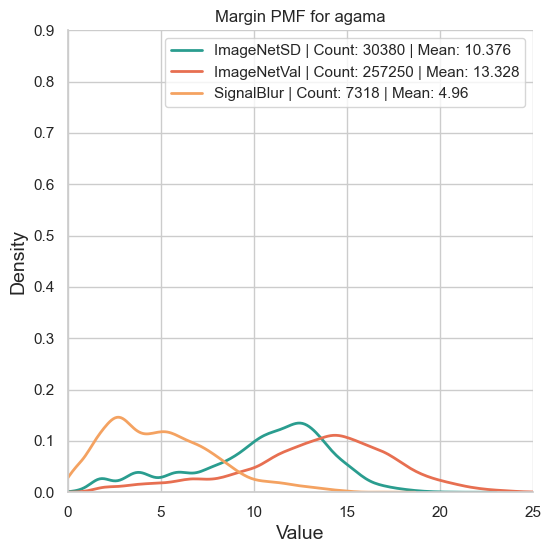

In [158]:
### Margins ResNet: ANALISIS CLASES 
experiments_names =  ['ImageNetA', 'ImageNetSD', 'ImageNetVal','SignalBlur']

all_class = [ 6, 13, 22, 30, 42]
for class_label in all_class:
    #compute_pmf_classes(margin_df_ResNet_list, 100, class_label, experiments_names)
    compute_pmf_classes(margin_df_ResNet_list, 100, class_label, experiments_names, 0.9)

6
class len:  6481
mean:  11.847708008023453
std: 2.8054768587590075
median:  12.77
class len:  8191
mean:  9.991621316078621
std: 1.7460886014046775
median:  10.1032
class len:  257250
mean:  9.488081659863942
std: 1.1232785797470057
median:  9.4559
class len:  59616
mean:  10.579856424449812
std: 2.6538466634684874
median:  11.07255


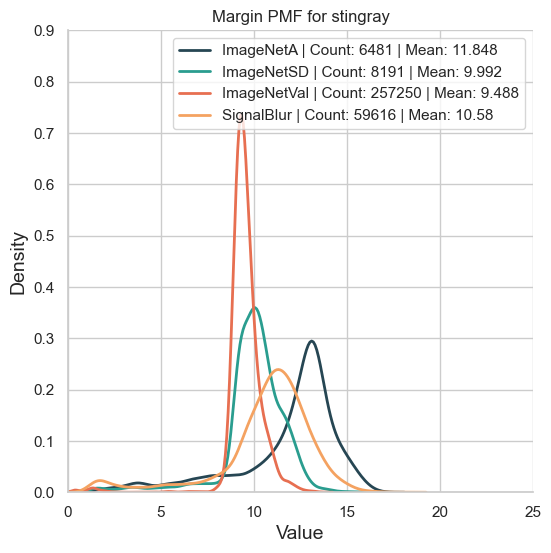

13
class len:  54121
mean:  10.004578633062952
std: 1.7386876886490796
median:  10.1118
class len:  257250
mean:  9.486228211467443
std: 1.130089014659906
median:  9.4581
class len:  73604
mean:  10.606643724525842
std: 2.6203057710957007
median:  11.0915


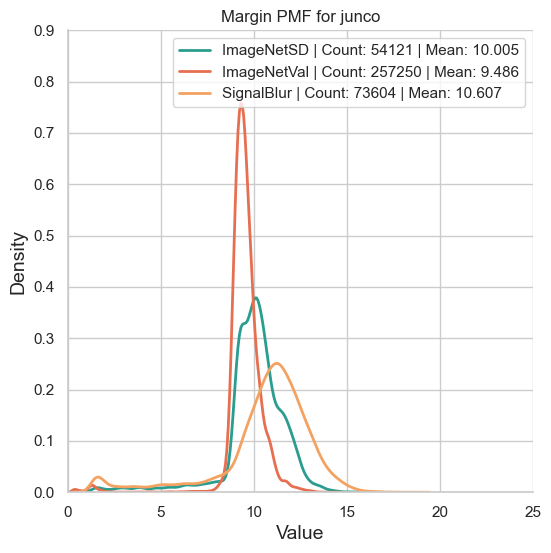

22
class len:  372
mean:  12.075075
std: 2.5945939100272066
median:  12.91605
class len:  54045
mean:  9.98428379498566
std: 1.7538601966225356
median:  10.1023
class len:  257250
mean:  9.485883060835762
std: 1.1279364036938029
median:  9.456
class len:  74386
mean:  10.587327942085874
std: 2.6574966684306554
median:  11.08915


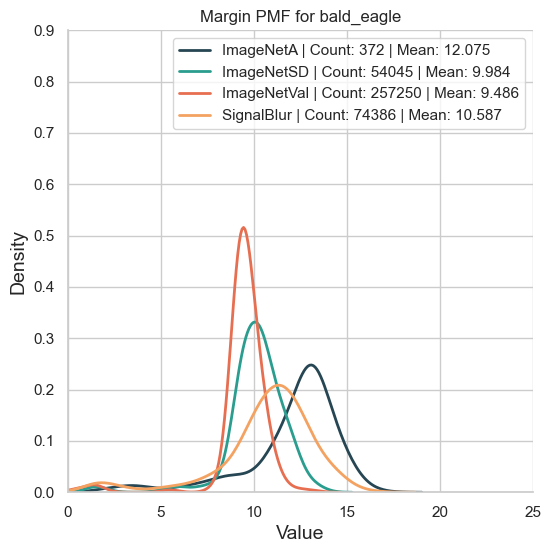

30
class len:  20616
mean:  9.992541370779975
std: 1.765777536312453
median:  10.1127
class len:  257250
mean:  9.486781781924195
std: 1.128171171514854
median:  9.458
class len:  37702
mean:  10.577316940745849
std: 2.667611321797065
median:  11.07295


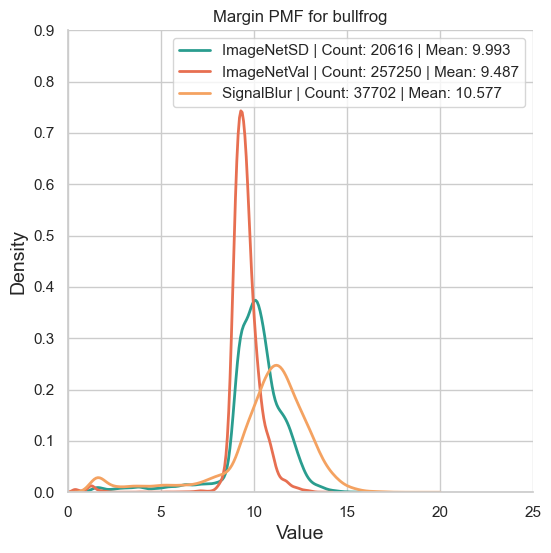

42
class len:  22655
mean:  9.993735056278966
std: 1.7555967979642182
median:  10.1188
class len:  257250
mean:  9.48589663984451
std: 1.1307079839456804
median:  9.4564
class len:  36782
mean:  10.588972785601653
std: 2.6463117731533834
median:  11.07715


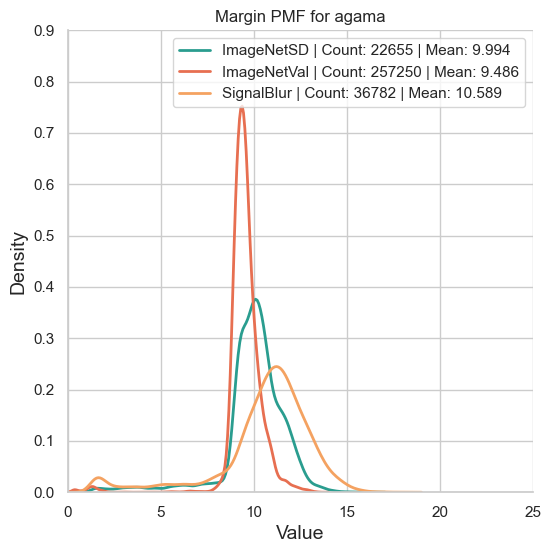

In [159]:
### Margins ViT: ANALISIS CLASES 
for class_label in all_class:
    compute_pmf_classes(margin_df_Vit_list, 100, class_label, experiments_names, 0.9)

In [45]:
#### Estudio de asociaciones de clases en PLANESET

def create_df(csv):
    columns_vals = [[] for _ in range(7)]
    with open(csv, "r") as f:
        for line in f:
            for i in range(6):
                columns_vals[i].append(line.strip().split(",")[i])
                if i == 5:
                    columns_vals[6].append(line.strip().split(",")[i+1:])
    
    column_names = ["true1", "true2", "true3", "pred1", "pred2", "pred3", "uniquePreds"]
    return  pd.DataFrame({column_names[i]: columns_vals[i] for i in range(7)})

def get_top_assoc_class_in_planeset(class_df, top_n):
    # generate the combination of classes
    all_class = [ 6, 13, 22, 30, 42]
    class_combis = list(combinations(all_class, 3))
    
    # get the class associated with each of the combinations
    associations = [[] for _ in range(len(class_combis))]
    for i,combi in enumerate(class_combis):
        for index, row in class_df.iterrows():
            uniquePreds = [int(pred) for pred in row['uniquePreds']]
            if set(combi).issubset(uniquePreds):
                associated_classes = list(set(uniquePreds) - set(combi))
                if len(associated_classes)!=0:
                    associations[i].extend(associated_classes) 

    # get the ones with highest counts
    result_dict = {}
    for i,asso in enumerate(associations):
        if len(asso)>0 :
            series = pd.Series(asso)
            value_counts = series.value_counts()
            result_dict[f"{class_combis[i]}"]= value_counts.head(top_n).to_dict()
    
    # return the labels
    with open("imagenet_class_index.json", "r") as json_file:
        data = json.load(json_file)

    label_dict = {}
    for key, inner_dict in result_dict.items():
        new_key = tuple(data[str(k)][1] for k in eval(key))
        new_inner_dict = {}
        
        for key_inner, value_inner in inner_dict.items():
            new_key_inner = data[str(key_inner)][1]
            new_inner_dict[new_key_inner] = value_inner
        
        label_dict[str(new_key)] = new_inner_dict
    
    return label_dict


In [47]:
model= "ResNet18"
#datasets =["ImageNetA_small", "ImageNetSD_small", "ImageNetVal_small",  "SignalBlur_small"]
#idx= 2 #to select dataset
root_class = f"results/{model}/classPredictions/"
#class_csv_path = [os.path.join(root_class, file) for file in os.listdir(root_class)][idx]
class_csv_path = root_class + "ResNet18_ImageNetVal_small_N35_R15.csv"
class_df = create_df(class_csv_path)
top5_planeset_preds_resnet_val = get_top_assoc_class_in_planeset(class_df,top_n =5)

In [15]:
top5_planeset_preds_resnet_val

{"('stingray', 'junco', 'bald_eagle')": {'kite': 14670,
  'vulture': 5941,
  'electric_ray': 3843,
  'water_ouzel': 3843,
  'puffer': 2785},
 "('stingray', 'junco', 'bullfrog')": {'water_ouzel': 5454,
  'tree_frog': 4569,
  'puffer': 4063,
  'electric_ray': 3390,
  'brambling': 2288},
 "('stingray', 'junco', 'agama')": {'electric_ray': 10493,
  'eel': 9703,
  'frilled_lizard': 5752,
  'American_chameleon': 5347,
  'brambling': 3455},
 "('stingray', 'bald_eagle', 'bullfrog')": {'puffer': 6380,
  'kite': 4381,
  'sturgeon': 3364,
  'vulture': 2673,
  'electric_ray': 2618},
 "('stingray', 'bald_eagle', 'agama')": {'eel': 10041,
  'electric_ray': 6626,
  'frilled_lizard': 6542,
  'vulture': 6484,
  'common_iguana': 4769},
 "('stingray', 'bullfrog', 'agama')": {'tailed_frog': 23203,
  'eel': 13027,
  'electric_ray': 8434,
  'frilled_lizard': 4825,
  'alligator_lizard': 4270},
 "('junco', 'bald_eagle', 'bullfrog')": {'kite': 13840,
  'water_ouzel': 13753,
  'vulture': 6093,
  'tree_frog': 32

In [16]:
model= "ResNet18"
#datasets =["ImageNetA_small", "ImageNetSD_small", "ImageNetVal_small",  "SignalBlur_small"]
idx= 3 #to select dataset
root_class = f"results/{model}/classPredictions/"
class_csv_path = [os.path.join(root_class, file) for file in os.listdir(root_class)][idx]
class_df = create_df(class_csv_path)
top5_planeset_preds_resnet_blur = get_top_assoc_class_in_planeset(class_df,top_n =5)

In [17]:
top5_planeset_preds_resnet_blur

{"('stingray', 'junco', 'bald_eagle')": {'kite': 625,
  'hamster': 580,
  'chickadee': 526,
  'Arctic_fox': 428,
  'albatross': 385},
 "('stingray', 'junco', 'bullfrog')": {'water_snake': 116,
  'hamster': 104,
  'kite': 94,
  'jacamar': 89,
  'drake': 87},
 "('stingray', 'junco', 'agama')": {'black_grouse': 139,
  'house_finch': 58,
  'langur': 52,
  'hammerhead': 52,
  'goldfish': 45},
 "('stingray', 'bald_eagle', 'bullfrog')": {'kite': 115,
  'water_snake': 100,
  'puffer': 58,
  'Arctic_fox': 58,
  'hammerhead': 57},
 "('stingray', 'bald_eagle', 'agama')": {'black_grouse': 133,
  'goldfish': 51,
  'European_gallinule': 48,
  'hammerhead': 48,
  'vulture': 29},
 "('stingray', 'bullfrog', 'agama')": {'black_grouse': 20,
  'goldfish': 19,
  'macaque': 12,
  'water_snake': 12,
  'European_gallinule': 10},
 "('junco', 'bald_eagle', 'bullfrog')": {'kite': 197,
  'drake': 93,
  'chickadee': 80,
  'water_ouzel': 60,
  'jacamar': 50},
 "('junco', 'bald_eagle', 'agama')": {'black_grouse': 10

In [10]:
# he probado a hacer los graficos estos pero queda muy feo y si queremos poner algo asi lo hacemos nosotros 
# o pemos los resultados en modo tabla 

"""import networkx as nx

combination = ('stingray', 'junco', 'bald_eagle')
classes = {
    'kite': 14670,
    'vulture': 5941,
    'electric_ray': 3843,
    'water_ouzel': 3843,
    'puffer': 2785
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for the combination and associated classes
G.add_node(combination, color='orange')  # Change the color of the central node
for cls, count in classes.items():
    G.add_node(cls, count=count/100)

# Add edges to represent the flow from the combination to each class
for cls, count in classes.items():
    G.add_edge(combination, cls, weight=count)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better spacing and seed for reproducibility

center_x = np.mean([pos[combination][0] for combination in G.nodes])
center_y = np.mean([pos[combination][1] for combination in G.nodes])
pos[combination] = (center_x, center_y)

node_size = [classes[cls] if cls in classes else 0 for cls in G.nodes]
node_color = [G.nodes[n].get('color', 'skyblue') for n in G.nodes]  

fig, ax = plt.subplots(figsize=(8, 6))  
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=node_size, node_color=node_color, font_color='black', edge_color='gray', width=2, alpha=0.7, ax=ax)
plt.show()"""


"import networkx as nx\n\ncombination = ('stingray', 'junco', 'bald_eagle')\nclasses = {\n    'kite': 14670,\n    'vulture': 5941,\n    'electric_ray': 3843,\n    'water_ouzel': 3843,\n    'puffer': 2785\n}\n\n# Create a directed graph\nG = nx.DiGraph()\n\n# Add nodes for the combination and associated classes\nG.add_node(combination, color='orange')  # Change the color of the central node\nfor cls, count in classes.items():\n    G.add_node(cls, count=count/100)\n\n# Add edges to represent the flow from the combination to each class\nfor cls, count in classes.items():\n    G.add_edge(combination, cls, weight=count)\n\n# Draw the graph\npos = nx.spring_layout(G, seed=42)  # Use spring layout for better spacing and seed for reproducibility\n\ncenter_x = np.mean([pos[combination][0] for combination in G.nodes])\ncenter_y = np.mean([pos[combination][1] for combination in G.nodes])\npos[combination] = (center_x, center_y)\n\nnode_size = [classes[cls] if cls in classes else 0 for cls in G.no

In [48]:
# Model level analysis 
# ver el numero de prediccciones correctas para cada modelo 
# over los differentes datasets, guardamos las predicciones pero es 
# jaleo verlo así xq las imagenes se repiten en los tripletes 

# asi q voy a cargar los modelos otra vez y hacer un forward pass sobre los datasets 

from utils import *

def make_preds(config):
    rootDir = "smallDatasets/"
    db_path = os.path.join(rootDir, config.dataset)
    
    class_labels = []
    preds= []

    # Get the file paths of the images in each folder
    class_folders_paths = [os.path.join(db_path, class_id) for class_id in config.id_classes]
    for i, folder_path in enumerate(class_folders_paths):
        folder_images_path = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)][:config.N]
        class_label = np.ones((1, len(folder_images_path))) * config.labels[i]
        class_labels.extend(class_label)
        
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    
        images = [transform(Image.open(image_path).convert('RGB')) for image_path in folder_images_path]
        batch_tensor = torch.stack(images)

        #make oredictions
        with torch.no_grad():
            outputs = config.model(batch_tensor)
        
        preds.extend(torch.argmax(outputs,dim =1).tolist())


    return class_labels, preds

def get_class_ratios(dataset, df):
    labels= [ 6, 13, 22, 30, 42]
    df_model =df[df["dataset"] == dataset]
    df_correct= df_model[df_model['label'] == df_model['pred']]
    df_classes = df_correct[df_correct['label'].isin(labels)]

    # number of correct predictions per class/number of total class instances 
    class_ratios = df_classes['label'].value_counts() / df_model['label'].value_counts()
    return class_ratios.tolist()

def radar_plot(r1,r2,title):
    with open("imagenet_class_index.json", "r") as json_file:
        data = json.load(json_file)

    classes=[data[str(6)][1], data[str(13)][1], data[str(22)][1], data[str(30)][1], data[str(42)][1]]

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
          r=r1,
          theta= classes,
          fill='toself',
          name='ResNet18'
    ))

    fig.add_trace(go.Scatterpolar(
          r=r2,
          theta= classes,
          fill='toself',
          name='ViT'
    ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=False,
          range=[0, 1]
        )),
        height=300,  
        width=400, 
      showlegend=True
    )
    fig.update_layout(title_text=title.split("_")[0])
    fig.show()


c:\Users\Blanca\anaconda3\envs\TRDP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:

class2id = {
    "stingray": ["n01498041", "6"] ,
    "junco": ["n01534433", "13"],
    "robin": ["n01558993", "15"],
    "jay": ["n01580077", "17"],
    "bad_eagle": ["n01614925", "22"] ,
    "bullfrog": ["n01641577", "30"],
    "agama": ["n01687978", "42"]
}
my_class_selection= ["stingray", "junco", "bullfrog", "agama", "bad_eagle"]
class_selection = sorted([ class2id[class_][0] for class_ in my_class_selection])
print(class_selection)

datasets =["ImageNetA_small", "ImageNetSD_small", "ImageNetVal_small",  "SignalBlur_small"]

resultsResNet= []
resultsViT= []

for data in datasets:
    print(data)
    configResnet = Configuration(model= "ResNet18", 
                        N = 35,
                        dataset = data,
                        id_classes= class_selection,
                        resolution= 0,
                        useFilteredPaths = "False",
                        )

    configVit =  Configuration(model= "ViT", 
                        N = 35,
                        dataset = data,
                        id_classes= class_selection,
                        resolution= 0,
                        useFilteredPaths = "False",
                        )
    
    class_labels, predsResnet = make_preds(configResnet)
    _, predsViT=make_preds(configVit)
    
    resultsResNet.append(predsResnet)
    resultsViT.append(predsViT)
    print("done")
 

['n01498041', 'n01534433', 'n01614925', 'n01641577', 'n01687978']
ImageNetA_small


c:\Users\Blanca\anaconda3\envs\TRDP\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Blanca\anaconda3\envs\TRDP\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done
ImageNetSD_small
done
ImageNetVal_small
done
SignalBlur_small
done


In [50]:
# Create DataFrames
concatenated_resnet = list(itertools.chain(*resultsResNet))
concatenated_vit = list(itertools.chain(*resultsViT))
class_labels=np.concatenate(class_labels, axis=0).tolist()
datasetlabel= [dataset for dataset in datasets for _ in range(175)]

df_resnet = pd.DataFrame({"label":class_labels*4 , "pred": concatenated_resnet, "model": "ResNet18", "dataset": datasetlabel})
df_vit = pd.DataFrame({"label": class_labels*4, "pred": concatenated_vit, "model": "ViT", "dataset": datasetlabel})

#calculate ratio of correct predictions 
ratios_resnet = [[] for _ in range(len(datasets))]
ratios_vit = [[] for _ in range(len(datasets))]

for i,dataset in enumerate(datasets):
    ratios_resnet[i].extend(get_class_ratios(dataset, df_resnet))
    ratios_vit[i].extend(get_class_ratios(dataset, df_vit))

# radar plots
for i,dataset in enumerate(datasets):
    radar_plot(ratios_resnet[i],ratios_vit[i],dataset)
